# 无袖带血压估算

## 一、概述

血压（BP），又称动脉血压（ABP），是指循环血液对血管壁施加的压力。

### 1. 传统袖带法测量血压

- 最常见的非临床血压测量方法为自动袖带振荡法。
- 袖带缠绕上臂并充气至高于收缩压，随后缓慢放气至低于舒张压。
- 袖带内压力传感器记录动脉脉搏波动，通过脉搏波幅值计算收缩压和舒张压。
- 局限性：
  - 依赖一组设备专用的经验系数，不同设备间可能存在差异。
  - 仅依赖脉搏波幅，对于动脉硬化或肥胖患者测量准确性较差。

---

### 2、心电图（ECG）

- 心电图用于检测心脏疾病，通过贴在胸部、手臂和腿部的电极片记录心脏电活动。
- 异常心电图可提示：
  - 心律不齐（心律失常）
  - 心脏电活动传导异常
  - 心脏肥大
  - 心脏某些区域供血减少
  - “无症状”心梗（冠状动脉血流中断但无典型心梗症状）

---

### 3、光电容积描记图（PPG）

- PPG是一种通过光学方式获得的描记图，用于检测组织微血管床的血容量变化。
- 通常通过脉搏血氧仪获得，血氧仪通过照射皮肤并测量光吸收变化来监测血液灌注。
- 描记仪用于测量器官或全身体积变化（通常源于血液或空气含量的波动）。

---

### 4、数据集说明

- 血压数据集为无袖带血压估算算法设计提供了干净有效的信号。
- 采集数据包括原始ECG、PPG信号，以及袖带式血压计采集的高低压数据。

---

### 5、研究方法

- 方法：仅根据PPG信号预测血压。
- 评估方法：均方根误差（RMSE），RMSE越低，预测值越接近真实BP。

---

### 6、内容结构

- 信号分析
- 差分处理
- 基于机器学习的PPG预测BP
- 基于深度学习的BP预测方法

## 二、血压数据集分析

本章将对血压数据集的结构和内容进行分析与可视化，帮助我们深入理解数据的组成和特征，为后续的数据处理和模型训练做好准备。

- 了解数据集包含的信号类型及其存储方式
- 检查各类信号的采样率、通道分布及数据格式
- 可视化原始信号以观察其时域特征和典型形态
- 统计各记录的长度、缺失情况及分布特征
- 探索数据预处理需求，为后续特征提取和模型输入做准备

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_pickle('./data/input.pkl')
df.head()

,id,ecg_b1,ppg_b1,ecg_b2,ppg_b2,ecg_g1,ppg_g1,ecg_g2,ppg_g2,hbp_b1,hbp_b2,hbp_g1,hbp_g2,lbp_b1,lbp_b2,lbp_g1,lbp_g2
0,20250521001,"[-517.0, -523.0, -529.0, -535.0, -538.0, -538....","[342619.0, 342553.0, 342553.0, 342553.0, 34255...","[-611.0, -608.0, -605.0, -608.0, -604.0, -600....","[335155.0, 335155.0, 335155.0, 335155.0, 33515...","[-7355.0, -7362.0, -7360.0, -7368.0, -7371.0, ...","[106897.0, 106897.0, 106897.0, 106897.0, 10668...","[-6323.0, -6327.0, -6326.0, -6322.0, -6320.0, ...","[125504.0, 125504.0, 125504.0, 125504.0, 12550...",112.0,103.0,102.0,91.0,72.0,72.0,68.0,59.0
1,20250521003,"[-53.0, -44.0, -58.0, -74.0, -53.0, -56.0, -46...","[170290.0, 170290.0, 170328.0, 170328.0, 17032...","[-85.0, -101.0, -95.0, -89.0, -94.0, -97.0, -9...","[341474.0, 341373.0, 341373.0, 341373.0, 34137...","[-4879.0, -4880.0, -4874.0, -4876.0, -4876.0, ...","[158310.0, 158310.0, 158310.0, 158310.0, 15831...","[-5041.0, -5041.0, -5038.0, -5045.0, -5049.0, ...","[157048.0, 157048.0, 156844.0, 156844.0, 15684...",106.0,106.0,113.0,111.0,72.0,56.0,66.0,67.0
2,20250521004,"[-1366.0, -1381.0, -1376.0, -1375.0, -1368.0, ...","[150621.0, 150621.0, 150621.0, 150621.0, 15062...","[-2223.0, -2214.0, -2216.0, -2225.0, -2229.0, ...","[169528.0, 169528.0, 169552.0, 169552.0, 16955...","[2981.0, 2984.0, 2984.0, 2988.0, 2996.0, 2993....","[139094.0, 139094.0, 138859.0, 138859.0, 13885...","[982.0, 986.0, 990.0, 996.0, 998.0, 990.0, 992...","[285896.0, 286194.0, 286194.0, 286194.0, 28619...",97.0,95.0,97.0,85.0,58.0,56.0,59.0,51.0
3,20250521005,"[-897.0, -896.0, -894.0, -893.0, -890.0, -893....","[160261.0, 160261.0, 160261.0, 160261.0, 16029...","[-802.0, -802.0, -810.0, -811.0, -806.0, -797....","[154488.0, 154488.0, 154488.0, 154488.0, 15415...","[-5154.0, -5153.0, -5151.0, -5152.0, -5152.0, ...","[127009.0, 127009.0, 127009.0, 127038.0, 12703...","[-2537.0, -2525.0, -2524.0, -2513.0, -2512.0, ...","[125048.0, 125048.0, 125048.0, 125048.0, 12510...",103.0,103.0,109.0,93.0,61.0,61.0,63.0,52.0
4,20250521006,"[-979.0, -979.0, -989.0, -993.0, -989.0, -989....","[162436.0, 162436.0, 162494.0, 162494.0, 16249...","[-1221.0, -1219.0, -1214.0, -1212.0, -1203.0, ...","[156181.0, 156181.0, 156181.0, 156181.0, 15599...","[439.0, 449.0, 456.0, 456.0, 456.0, 456.0, 454...","[135950.0, 135713.0, 135713.0, 135713.0, 13571...","[-48.0, -43.0, -50.0, -56.0, -58.0, -55.0, -53...","[128235.0, 128303.0, 128303.0, 128303.0, 12830...",106.0,109.0,105.0,108.0,74.0,73.0,77.0,70.0


In [12]:
new_df = df[["ecg_b1", "ppg_b1", "hbp_b1", "lbp_b1"]]
new_df = new_df.iloc[:, :10]
new_df

,ecg_b1,ppg_b1,hbp_b1,lbp_b1
0,"[-517.0, -523.0, -529.0, -535.0, -538.0, -538....","[342619.0, 342553.0, 342553.0, 342553.0, 34255...",112.0,72.0
1,"[-53.0, -44.0, -58.0, -74.0, -53.0, -56.0, -46...","[170290.0, 170290.0, 170328.0, 170328.0, 17032...",106.0,72.0
2,"[-1366.0, -1381.0, -1376.0, -1375.0, -1368.0, ...","[150621.0, 150621.0, 150621.0, 150621.0, 15062...",97.0,58.0
3,"[-897.0, -896.0, -894.0, -893.0, -890.0, -893....","[160261.0, 160261.0, 160261.0, 160261.0, 16029...",103.0,61.0
4,"[-979.0, -979.0, -989.0, -993.0, -989.0, -989....","[162436.0, 162436.0, 162494.0, 162494.0, 16249...",106.0,74.0
...,...,...,...,...
1052,"[-90.0, -80.0, -80.0, -87.0, -86.0, -69.0, -62...","[170326.0, 170326.0, 170326.0, 170194.0, 17019...",178.0,102.0
1053,"[-486.0, -484.0, -487.0, -496.0, -490.0, -497....","[213976.0, 213976.0, 213976.0, 214001.0, 21400...",157.0,109.0
1054,"[-2509.0, -2506.0, -2506.0, -2507.0, -2508.0, ...","[173280.0, 173374.0, 173374.0, 173374.0, 17337...",150.0,100.0
1055,"[-3465.0, -3464.0, -3462.0, -3462.0, -3464.0, ...","[172896.0, 172931.0, 172931.0, 172931.0, 17293...",156.0,93.0


In [13]:
sample_rate = 500  # 采样频率
time = np.arange(sample_rate) / sample_rate

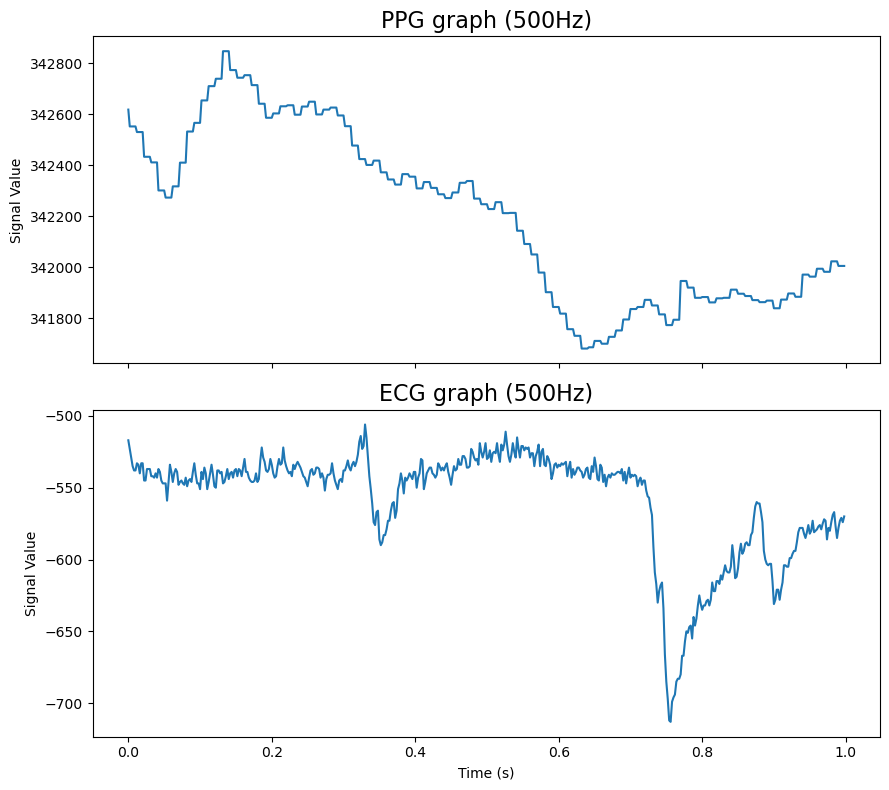

In [14]:
# PPG和ECG信号，采样频率为500Hz
ppg = df['ppg_b1'].iloc[0]
ecg = df['ecg_b1'].iloc[0]

fig, ax = plt.subplots(2, 1, figsize=(9, 8), sharex=True)

ax[0].set_title('PPG graph (500Hz)', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(time, np.array(ppg[:sample_rate]))

ax[1].set_title('ECG graph (500Hz)', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].set_xlabel('Time (s)')
ax[1].plot(time, np.array(ecg[:sample_rate]))

plt.tight_layout()
plt.show()